In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


In [3]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [4]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# One-hot encode the target labels
y_encoded = to_categorical(y, num_classes=3)  # Iris has 3 species, so 3 classes

In [6]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [7]:
# Print the shape of the data to confirm preprocessing
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)
Training labels shape: (120, 3)
Testing labels shape: (30, 3)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Define the model architecture
model = Sequential()

In [10]:
# Input layer (implicitly included by specifying input shape in the first hidden layer)
# First hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=4, activation='relu'))

d:\data_set\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Input layer (implicitly included by specifying input shape in the first hidden layer)
# First hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=4, activation='relu'))

In [12]:
# Output layer with 3 neurons (one for each class) and softmax activation
model.add(Dense(3, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Summarize the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model using backpropagation
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3985 - loss: 1.0204 - val_accuracy: 0.8333 - val_loss: 0.8136
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 0.7858 - val_accuracy: 0.9000 - val_loss: 0.6285
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7913 - loss: 0.6116 - val_accuracy: 0.9000 - val_loss: 0.4956
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8533 - loss: 0.5040 - val_accuracy: 0.9000 - val_loss: 0.4081
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8247 - loss: 0.4165 - val_accuracy: 0.9000 - val_loss: 0.3519
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7699 - loss: 0.4326 - val_accuracy: 0.9000 - val_loss: 0.3132
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.3501 - val_accuracy: 0.9000 - val_loss: 0.2776
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8592 - loss: 0.3298 - val_accuracy: 0.9000 - val_loss

In [16]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

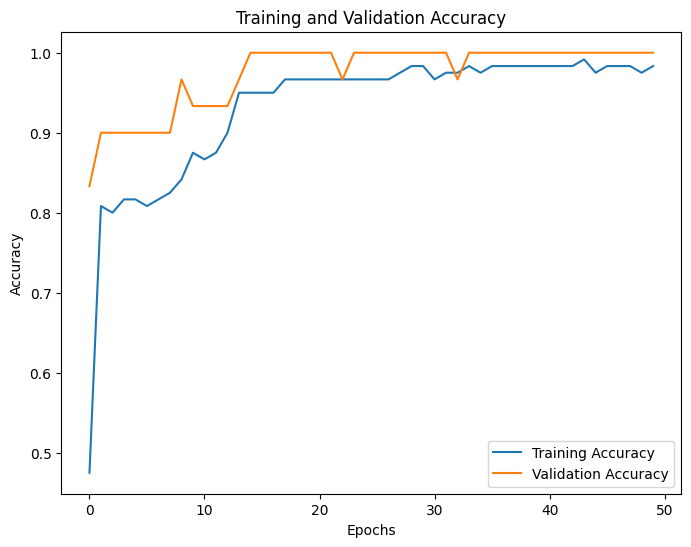

In [17]:
# Accuracy plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


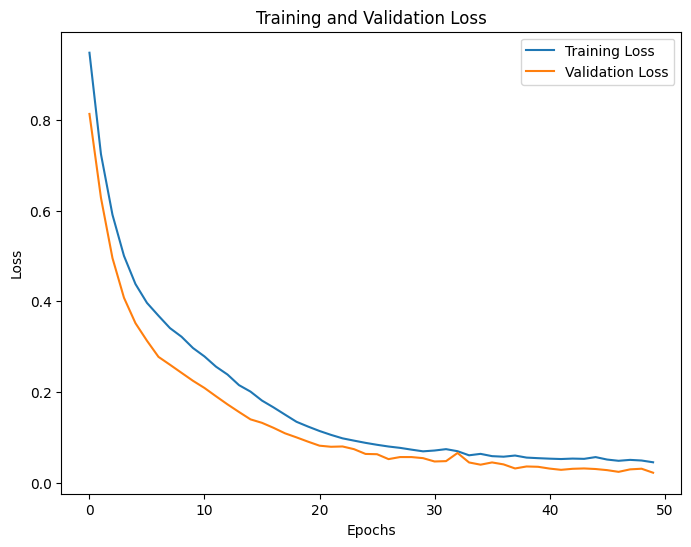

In [18]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Save the trained model to a file
model.save('iris_model.h5')  # Saves the model in HDF5 format


In [20]:
# Save the model in the native Keras format
model.save('iris_model.keras')

In [21]:
# Load the saved model from the native Keras format
from tensorflow.keras.models import load_model
model = load_model('iris_model.keras')

d:\data_set\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
model.save('iris_model.keras', include_optimizer=False)


In [23]:
from tensorflow.keras.models import load_model
model = load_model('iris_model.keras')

# Re-compile the model with the desired optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
predicted_labels = predictions.argmax(axis=1)

# Print predicted labels for the test set
print(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 0.0220
Test Accuracy: 100.00%
Test Loss: 0.0220


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9819 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9915 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9767 - loss: 0.0523 - val_accuracy: 1.0000 - val_loss: 0.0219
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9946 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9915 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9860 - loss: 0.0388 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9892 - loss: 0.0352 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 1.0000 - val_loss: 0.0169


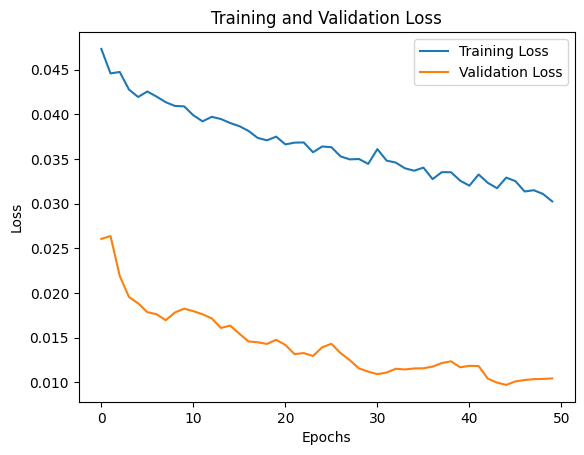

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


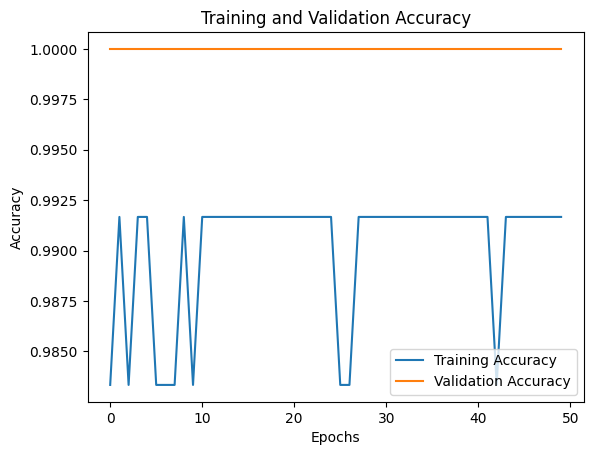

In [27]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
